# Assignment - 3

In [1]:
from IPython.display import display, Latex  # type: ignore
import matplotlib.pyplot as plt

In [2]:
from lib.linalg import power_iteration, QRFactorization
from lib.matrix import Matrix
from lib.array import Array, arange
from lib.optimize import polyfit, get_condition_number, chebyshev
from lib.plotter import plot_poly, plot_chebyshev
from lib.stats import (
    mean,
    expected_normal,
    chi2,
    chi2_ppf,
    f_test,
    t_test,
    std,
    pooled_std,
)

### Question 1

In [3]:
A = [[4, 2 / 3, -4 / 3, 4 / 3], [2 / 3, 4, 0, 0], [-4 / 3, 0, 6, 2], [4 / 3, 0, 2, 6]]

A = Matrix.from_list(A)

Part (a)


In [4]:
max_eigval, sol = power_iteration(A)

print(f"Largest eigenvalue of A: {round(max_eigval, 4)}")
print(f"Corresponding eigenvector: {round(sol, 4)}")

Largest eigenvalue of A: 8.0
Corresponding eigenvector: ([0.0005, 0.0002, 0.7068, 0.7074], double)


Part (b)


In [5]:
sol = QRFactorization(A)

eigvals = sol.solve()

print(f"The eigenvalues of A are: {round(eigvals, 4)}")

The eigenvalues of A are: ([8.0, 6.0, 4.0, 2.0], double)


### Question 2

In [6]:
data = [
    #  x	 y
    [0.00, 0.486],
    [0.05, 0.866],
    [0.10, 0.944],
    [0.15, 1.144],
    [0.20, 1.103],
    [0.25, 1.202],
    [0.30, 1.166],
    [0.35, 1.191],
    [0.40, 1.124],
    [0.45, 1.095],
    [0.50, 1.122],
    [0.55, 1.102],
    [0.60, 1.099],
    [0.65, 1.017],
    [0.70, 1.111],
    [0.75, 1.117],
    [0.80, 1.152],
    [0.85, 1.265],
    [0.90, 1.380],
    [0.95, 1.575],
    [1.00, 1.857],
]

data = Matrix.from_list(data)

Using normal Cubic regression


For standard cubic polynomial of type:


<IPython.core.display.Latex object>

Coefficients of the polynomial: 
array('d', [0.57466, 4.72586, -11.12822, 7.66868])
Covariance matrix: 
   0.54404   -3.96041    7.71692   -4.39174
  -3.96041   42.86912  -97.35582   60.14891
   7.71692  -97.35582  238.27685 -154.09626
  -4.39174   60.14891 -154.09626  102.73084
Condition number of the covariance matrix: 
12195.78586908228


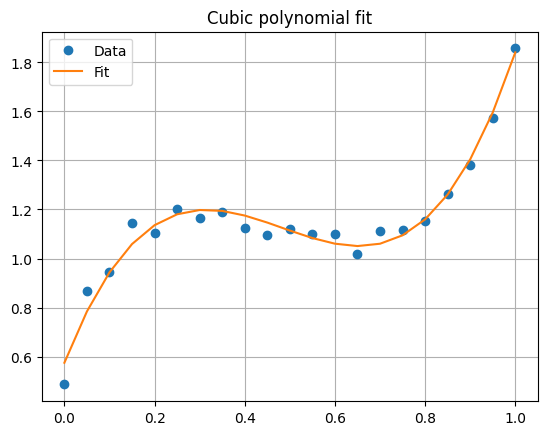

In [7]:
xdata = Array("d", data[:, 0])
ydata = Array("d", data[:, 1])

sol, cov = polyfit(xdata, ydata, 3)

print("For standard cubic polynomial of type:")
display(Latex(r"$f(x) = a_0 + a_1x + a_2x^2 + a_3x^3$"))
print(f"Coefficients of the polynomial: \n{sol}")

print(f"Covariance matrix: \n{cov}")
cond = get_condition_number(cov)
print(f"Condition number of the covariance matrix: \n{cond}")

# Plot the polynomial
plot_poly(xdata, ydata, sol, 3)
plt.title("Cubic polynomial fit")
plt.show()

Using Chebyshev polynomials


For Chebyshev polynomial of type:


<IPython.core.display.Latex object>

Coefficients of the polynomial: 
([1.160969479033552, 0.39351446798815237, 0.04684983209010653, 0.23964617571596986], double)
Covariance matrix: 
   0.05554        0.0    0.02972        0.0
       0.0    0.14346        0.0    0.03692
   0.02972        0.0    0.11144        0.0
       0.0    0.03692        0.0    0.10032
Condition number of the covariance matrix: 
6.404597049865556


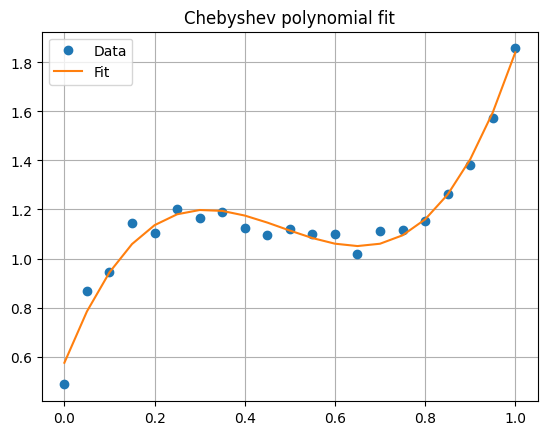

In [8]:
sol, cov = chebyshev(xdata, ydata, 3)

print("For Chebyshev polynomial of type:")
display(Latex(r"$f(x) = a_0 + a_1T_1(x) + a_2T_2(x) + a_3T_3(x)$"))

print(f"Coefficients of the polynomial: \n{sol}")

print(f"Covariance matrix: \n{cov}")
cond = get_condition_number(cov)
print(f"Condition number of the covariance matrix: \n{cond}")

# Plot the polynomial
plt.plot(xdata, ydata, "o", label="Data")
plot_chebyshev(xdata, sol)
plt.title("Chebyshev polynomial fit")
plt.show()

A low condition number for the Chebyshev fit tells us it is less prone or less sensitive in terms of changing the resultant value from the input values. In other terms, the fitting parameters we got from Chebyshev are more mathematical stable than the simple cubic regression.


### Question 3

Expected distribution: 
([32.394579907912835, 145.18243471148602, 239.36536824085962, 145.18243471148602, 32.394579907912835], double)
Chi-square statistical value: 
68.95701662769245
Degrees of freedom: 
4
Critical value at 5% significance level: 
9.487729036781154
Critical value at 10% significance level: 
7.779440339734858


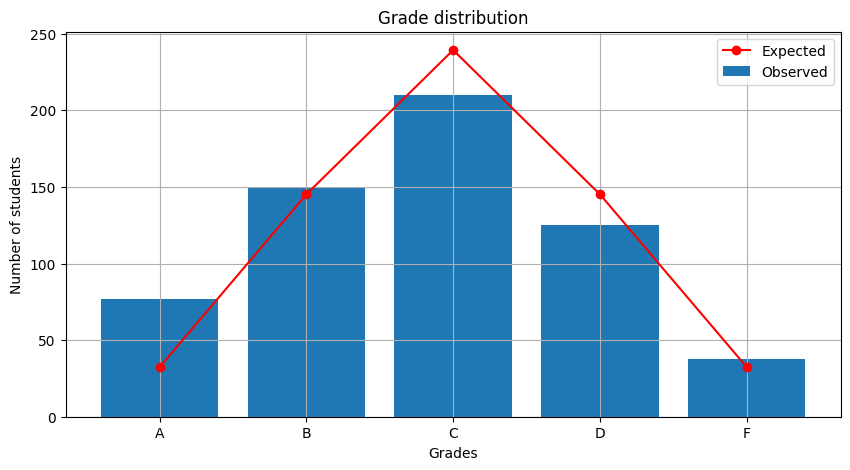

Reject null hypothesis at 5% significance level as distribution is not normal
Reject null hypothesis at 10% significance level as distribution is not normal


In [9]:
grades = ["A", "B", "C", "D", "F"]
observed_distribution = [77, 150, 210, 125, 38]
grade_num = arange("d", 0, len(grades), 1)

total_students = sum(observed_distribution)

expected_distribution = expected_normal(grade_num, observed_distribution)

print(f"Expected distribution: \n{expected_distribution}")

# Chi-square test
chi_square_statistical = chi2(observed_distribution, expected_distribution)
print(f"Chi-square statistical value: \n{chi_square_statistical}")
# Degrees of freedom
df = len(grades) - 1
print(f"Degrees of freedom: \n{df}")
# Critical value for 5% significance level
critical_at_5 = chi2_ppf(0.95, df)
print(f"Critical value at 5% significance level: \n{critical_at_5}")
critical_at_10 = chi2_ppf(0.90, df)
print(f"Critical value at 10% significance level: \n{critical_at_10}")

# Plot the distribution
plt.figure(figsize=(10, 5))
plt.bar(grades, observed_distribution, label="Observed")
plt.plot(grades, expected_distribution, "ro-", label="Expected")
plt.xlabel("Grades")
plt.ylabel("Number of students")
plt.title("Grade distribution")
plt.legend()
plt.grid()
plt.show()

# Check for null hypothesis
if chi_square_statistical > critical_at_5:
    print(
        "Reject null hypothesis at 5% significance level as distribution is not normal"
    )
else:
    print(
        "Fail to reject null hypothesis at 5% significance level as distribution may be normal"
    )

if chi_square_statistical > critical_at_10:
    print(
        "Reject null hypothesis at 10% significance level as distribution is not normal"
    )
else:
    print(
        "Fail to reject null hypothesis at 10% significance level as distribution may be normal"
    )

### Question 4

F - test

In [10]:
ship_A = Array(
    "d", [4.65, 4.84, 4.59, 4.75, 4.63, 4.75, 4.58, 4.82, 4.86, 4.60, 4.77, 4.65, 4.80]
)
ship_B = Array("d", [4.75, 4.79, 4.74, 4.74, 4.77, 4.58, 4.81])

mean_A = mean(ship_A)
std_A = std(ship_A)

mean_B = mean(ship_B)
std_B = std(ship_B)

print(f"Mean of ship A: {mean_A}")
print(f"Standard deviation of ship A: {std_A}")

print(f"Mean of ship B: {mean_B}")
print(f"Standard deviation of ship B: {std_B}")

f_statistical = std_A**2 / std_B**2
print(f"F-statistical value: {f_statistical}")

# F-test
f_critical_5 = f_test(0.95, len(ship_A) - 1, len(ship_B) - 1)
print(f"F-critical value at 5% significance level: {f_critical_5}")

f_critical_10 = f_test(0.90, len(ship_A) - 1, len(ship_B) - 1)
print(f"F-critical value at 10% significance level: {f_critical_10}")

# Check for null hypothesis
if f_statistical > f_critical_5:
    print("Reject null hypothesis at 5% significance level as variances are not equal")
else:
    print(
        "Fail to reject null hypothesis at 5% significance level as variances are close"
    )

if f_statistical > f_critical_10:
    print("Reject null hypothesis at 10% significance level as variances are not equal")
else:
    print(
        "Fail to reject null hypothesis at 10% significance level as variances are close"
    )

Mean of ship A: 4.714615384615384
Standard deviation of ship A: 0.09731909328163599
Mean of ship B: 4.74
Standard deviation of ship B: 0.06969320524371686
F-statistical value: 1.9499129829446638
F-critical value at 5% significance level: 3.9999353833188764
F-critical value at 10% significance level: 2.904720508833658
Fail to reject null hypothesis at 5% significance level as variances are close
Fail to reject null hypothesis at 10% significance level as variances are close


T - test

In [11]:
df_t = len(ship_A) + len(ship_B) - 2
print(f"Degrees of freedom for t-test: {df_t}")

pooled_std = pooled_std(std_A, std_B, len(ship_A), len(ship_B))
print(f"Pooled standard deviation: {pooled_std}")

t_statistical = (mean_A - mean_B) / pooled_std
print(f"T-statistical value: {t_statistical}")

# T-test
t_critical_5 = t_test(0.95, df_t)
print(f"T-critical value at 5% significance level: {t_critical_5}")

t_critical_10 = t_test(0.90, df_t)
print(f"T-critical value at 10% significance level: {t_critical_10}")

# Check for null hypothesis
if t_statistical > t_critical_5:
    print("Reject null hypothesis at 5% significance level as means are not equal")
else:
    print("Fail to reject null hypothesis at 5% significance level as means are close")

if t_statistical > t_critical_10:
    print("Reject null hypothesis at 10% significance level as means are not equal")
else:
    print("Fail to reject null hypothesis at 10% significance level as means are close")

Degrees of freedom for t-test: 18
Pooled standard deviation: 0.08906767968135687
T-statistical value: -0.28500366772133806
T-critical value at 5% significance level: 1.7340636066175354
T-critical value at 10% significance level: 1.330390943569909
Fail to reject null hypothesis at 5% significance level as means are close
Fail to reject null hypothesis at 10% significance level as means are close
